In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family ='gulim')
plt.rc('axes', unicode_minus = False)

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [45]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size = 0.2
)

In [46]:
ss = StandardScaler()
ss.fit(train_X)

train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_scaled, train_y)
print('Train acc = {:.4f}'.format(knn.score(train_scaled, train_y)))
print('Test acc = {:.4f}'.format(knn.score(test_scaled, test_y)))


Train acc = 0.9667
Test acc = 0.9333


In [49]:
## Attribute
print('classes = ',knn.classes_)
#print('feature names = ',knn.feature_names_in_) #변수 이름
print("metric = ", knn.effective_metric_)  #평가지표
print("Samples = ",knn.n_samples_fit_)
print("n neighbors = ", knn.n_neighbors)

classes =  ['setosa' 'versicolor' 'virginica']
metric =  euclidean
Samples =  120
n neighbors =  5


In [27]:
##
wine = pd.read_csv('https://bit.ly/wine-date')
print(wine.head())
print(wine.info())

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None


In [28]:
wine['class'] = wine['class'].astype('int32').astype('category')
wine.info()
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   alcohol  6497 non-null   float64 
 1   sugar    6497 non-null   float64 
 2   pH       6497 non-null   float64 
 3   class    6497 non-null   category
dtypes: category(1), float64(3)
memory usage: 158.8 KB


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


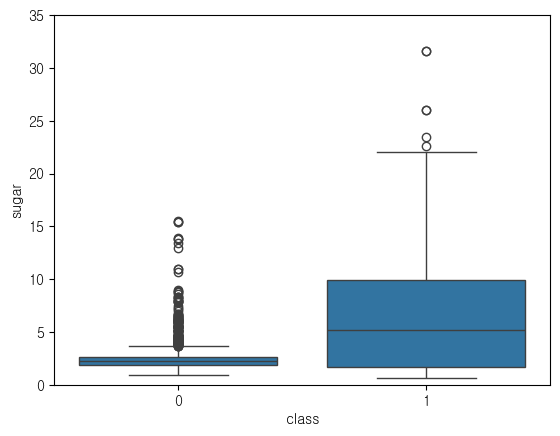

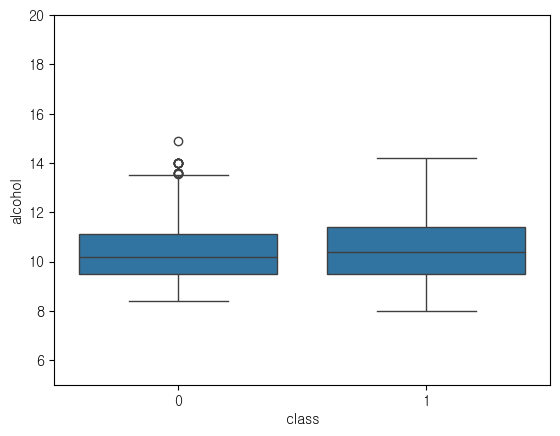

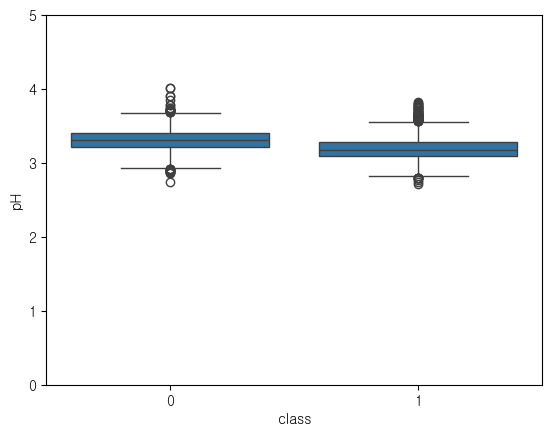

In [72]:
sns.boxplot(wine, x = 'class', y = 'sugar')
plt.ylim(0, 35)
plt.show()

sns.boxplot(wine, x = 'class', y = 'alcohol')
plt.ylim(5, 20)
plt.show()

sns.boxplot(wine, x = 'class', y = 'pH')
plt.ylim(0, 5)
plt.show()

In [65]:
# wine.head()
X = wine.iloc[:, :-1]
y = wine.iloc[:, -1]

print(X.shape)
print(y.shape)

(6497, 3)
(6497,)


In [73]:
## Split
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2
)

print('train shape =', train_X.shape)
print('test shape =', test_X.shape)

train shape = (5197, 3)
test shape = (1300, 3)


In [77]:
## Scaling
standScaler = StandardScaler()
standScaler.fit(train_X)

print(standScaler.mean_)
print(standScaler.scale_)

train_scaled = standScaler.transform(train_X)
test_scaled = standScaler.transform(test_X)

[10.50395228  5.38773331  3.22018857]
[1.19476468 4.76197326 0.16200579]


In [6]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_leaf_nodes=10)
dt.fit(train_scaled, train_y)

print('Train acc =', dt.score(train_scaled, train_y))
print('Test acc =', dt.score(test_scaled, test_y))

Train acc = 0.8691552818934001
Test acc = 0.8469230769230769


In [5]:
from sklearn.tree import plot_tree

plot_tree(dt, max_depth = 3, filled=True)
plt.show()

NameError: name 'dt' is not defined

In [88]:
print(dt.feature_importances_) # 변수 중요도 큰게 더 중요해~
pd.DataFrame(dt.feature_importances_, index = train_X.columns)

[0.13654794 0.76851005 0.09494201]


,0
alcohol,0.136548
sugar,0.768510
pH,0.094942


In [4]:
## 교차검증(Cross validation, cv)
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV

In [113]:
cv_X_scaled =ss.fit_transform(X)

In [114]:
print(y.value_counts())  # << too asymetric

class
1    4898
0    1599
Name: count, dtype: int64


In [115]:
splitter = StratifiedKFold(n_splits=5, shuffle=True)
cv_result = cross_validate(dt, cv_X_scaled, y, cv = splitter)

In [116]:
print(cv_result['test_score'].mean())

0.8594735595428435


In [130]:
## GridSearch
dt = DecisionTreeClassifier()

params = {
    'min_impurity_decrease':np.arange(0.001, 0.01, 0.0001),
    'max_depth': np.arange(5, 30, 1),
    'min_samples_split': np.arange(2, 100, 10)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
# cv_result = cross_validate(dt, cv_X_scaled, y, cv = splitter)

grid_cv = GridSearchCV(dt,
                        param_grid = params,
                        cv = splitter)

grid_cv.fit(cv_X_scaled, y)
# print(grid_cv.cv_rsults_)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_impurity_decrease': array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0...
       0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064, 0.0065,
       0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072, 0.0073,
       0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 , 0.0081,
       0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089,
       0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099]),
                         'min_samples_split': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])})

In [127]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [128]:
print(grid_cv.best_params_)
print(np.mean(grid_cv.cv_results_['mean_test_score']))

{'max_depth': 15}
0.8603311592179953


In [3]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [136]:
rf = RandomForestClassifier(n_estimators=100) # n_estimator is the only difference here

In [139]:
cv_X_scaled = ss.fit_transform(X)
y
print(cv_X_scaled.shape)
print(y.shape)

(6497, 3)
(6497,)


In [141]:
params = {
    'n_estimators':[50, 80, 100, 120],
    'max_depth': [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
grid_rf = GridSearchCV(rf, param_grid= params, cv = splitter)
grid_rf.fit(cv_X_scaled, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12, 15],
                         'n_estimators': [50, 80, 100, 120]})

In [145]:
print(grid_rf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [143]:
print(grid_rf.best_params_)
print(grid_rf.cv_results_['mean_test_score'])
print(grid_rf.best_score_)

{'max_depth': 15, 'n_estimators': 100}
[0.83176716 0.8265358  0.82761675 0.82145793 0.85655107 0.86055309
 0.85978504 0.85747557 0.86871061 0.86871143 0.86886528 0.86886599
 0.87871629 0.87840812 0.87656244 0.87886978 0.89133736 0.88918126
 0.89072138 0.89195274 0.8942602  0.89210612 0.89564576 0.89518399]
0.8956457630129686


In [147]:
rf_best = RandomForestClassifier(n_estimators=120,
                                max_depth=15)
rf_best.fit(cv_X_scaled, y)                            

RandomForestClassifier(max_depth=15, n_estimators=120)

In [152]:
print(rf_best.feature_importances_)
print(rf_best.score(cv_X_scaled, y))

[0.22946927 0.5120809  0.25844983]
0.9907649684469755


In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
gb = GradientBoostingClassifier()

# params = {
#     'n_estimators':[50, 80, 100, 120],
#     'max_depth': [3, 5, 7, 9, 12, 15]
# }

splitter = StratifiedKFold(n_splits=5, shuffle=True)
cv_score = cross_validate(gb, cv_X_scaled, y, cv = splitter)
# grid_gb.fit(cv_X_scaled, y)
print(np.mean(cv_score['test_score']))

0.8671708414756913


In [35]:
#################################################################################

In [17]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Load data
titanic = sns.load_dataset('titanic')

# One-hot encode 'sex' column
titanic = pd.get_dummies(titanic, columns=['sex'], drop_first=True)

# Select features (explicitly exclude 'survived')
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male'] # sex_male=1 :male
X = titanic[features]
y = titanic['survived']

print("X shape:", X.shape)
print("y shape:", y.shape)

# Split data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train shape =', train_X.shape)
print('Test shape =', test_X.shape)

# Scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_X)
test_scaled = scaler.transform(test_X)

# Train model
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, max_leaf_nodes=10, random_state=42)
dt.fit(train_scaled, train_y)

# Evaluate model
print('Train acc =', dt.score(train_scaled, train_y))
print('Test acc =', dt.score(test_scaled, test_y))

X shape: (891, 6)
y shape: (891,)
Train shape = (712, 6)
Test shape = (179, 6)
Train acc = 0.8412921348314607
Test acc = 0.7877094972067039


In [18]:
## 교차검증(Cross validation, cv)
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cv_X_scaled =standScaler.fit_transform(X)
splitter = StratifiedKFold(n_splits=5, shuffle=True)
cv_result = cross_validate(dt, cv_X_scaled, y, cv = splitter)
print(cv_result['test_score'].mean())

0.8091770761408575


In [19]:
## GridSearch
dt = DecisionTreeClassifier()

params = {
    'min_impurity_decrease':np.arange(0.001, 0.01, 0.0001),
    'max_depth': np.arange(5, 30, 1),
    'min_samples_split': np.arange(2, 100, 10)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
# cv_result = cross_validate(dt, cv_X_scaled, y, cv = splitter)

grid_cv = GridSearchCV(dt,
                        param_grid = params,
                        cv = splitter)

grid_cv.fit(cv_X_scaled, y)
# print(grid_cv.cv_rsults_)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_impurity_decrease': array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0...
       0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064, 0.0065,
       0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072, 0.0073,
       0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 , 0.0081,
       0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089,
       0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099]),
                         'min_samples_split': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])})

In [25]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_impurity_decrease', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [26]:
print(grid_cv.best_params_)
print(np.mean(grid_cv.cv_results_['mean_test_score']))

{'max_depth': np.int64(5), 'min_impurity_decrease': np.float64(0.001), 'min_samples_split': np.int64(2)}
1.0


In [27]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

rf = RandomForestClassifier(n_estimators=100)

cv_X_scaled = standScaler.fit_transform(X)
y
print(cv_X_scaled.shape)
print(y.shape)

(891, 6)
(891,)


In [28]:
params = {
    'n_estimators':[50, 80, 100, 120],
    'max_depth': [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
grid_rf = GridSearchCV(rf, param_grid= params, cv = splitter)
grid_rf.fit(cv_X_scaled, y)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12, 15],
                         'n_estimators': [50, 80, 100, 120]})

In [29]:
print(grid_rf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [30]:
print(grid_rf.best_params_)
print(grid_rf.cv_results_['mean_test_score'])
print(grid_rf.best_score_)

{'max_depth': 3, 'n_estimators': 50}
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [31]:
rf_best = RandomForestClassifier(n_estimators=120,
                                max_depth=15)
rf_best.fit(cv_X_scaled, y)         

RandomForestClassifier(max_depth=15, n_estimators=120)

In [32]:
print(rf_best.feature_importances_)
print(rf_best.score(cv_X_scaled, y))

[0.86963612 0.03582845 0.02390665 0.01105437 0.0074133  0.0521611 ]
1.0


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
gb = GradientBoostingClassifier()

# params = {
#     'n_estimators':[50, 80, 100, 120],
#     'max_depth': [3, 5, 7, 9, 12, 15]
# }

splitter = StratifiedKFold(n_splits=5, shuffle=True)
cv_score = cross_validate(gb, cv_X_scaled, y, cv = splitter)
# grid_gb.fit(cv_X_scaled, y)
print(np.mean(cv_score['test_score']))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py", line 659, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
######################################

In [25]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic = titanic.loc[:, :'fare']
titanic.dropna(subset = ['age'], axis=0, inplace =True)


In [28]:
X = titanic.loc[:, 'pclass':'fare']
y = titanic['survived']

print('x shape =', X.shape)
print('y shape =', y.shape)

X.head()

x shape = (714, 6)
y shape = (714,)


,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [31]:
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
print(X.head())

KeyError: "None of [Index(['sex'], dtype='object')] are in the [columns]"

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold

In [33]:
dt = DecisionTreeClassifier()

params = {
    'max_depth':range(3, 20, 1),
    'max_leaf_nodes': range(3, 20, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)

gs_dt = GridSearchCV(dt, param_grid=params, cv = splitter)
gs_dt.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'max_leaf_nodes': range(3, 20)})

In [38]:
print('Best parmeters = ', gs_dt.best_estimator_)
print('cv score = {:.4f}'.format(gs_dt.best_score_))

Best parmeters =  DecisionTreeClassifier(max_depth=3, max_leaf_nodes=3)
cv score = 1.0000


In [41]:
## rf
rf = RandomForestClassifier()

parmas = {
    'n_estimators': range(90, 120, 1),
    'max_depth': range(3, 15, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
grid_rf = GridSearchCV(rf, param_grid=params, cv = splitter)
grid_rf.fit(X, y)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'max_leaf_nodes': range(3, 20)})

In [43]:
print('Best parmeters = ', grid_rf.best_estimator_)
print('cv score = {:.4f}'.format(grid_rf.best_score_))

Best parmeters =  RandomForestClassifier(max_depth=3, max_leaf_nodes=3)
cv score = 1.0000


In [44]:
## gb
gb = GradientBoostingClassifier()

params = {
    'learning_rate': np.arange(0.1, 1, 0.1), # << should be included
    'max_depth': range(3, 5, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)

grid_gb = GridSearchCV(gb, param_grid=params, cv = splitter)
grid_gb.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 5)})

In [45]:
print('Best parmeters = ', grid_gb.best_estimator_)
print('cv score = {:.4f}'.format(grid_gb.best_score_))

Best parmeters =  GradientBoostingClassifier(learning_rate=np.float64(0.1))
cv score = 1.0000


In [49]:
##########################################################################

In [48]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [53]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [57]:
wine['class'] = wine['class'].astype('int32').astype('category')
wine.head()
# wine.info()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [58]:
X = wine.iloc[:, :-1]
y = wine['class']

In [61]:
# should scale at first
standScaler = StandardScaler()
X_scaled = standScaler.fit_transform(X)
X_scaled[:10]

array([[-0.91546416, -0.7447781 ,  1.81308951],
       [-0.58006813, -0.59764007, -0.11507303],
       [-0.58006813, -0.66069923,  0.25811972],
       [-0.58006813, -0.7447781 , -0.3638682 ],
       [-0.91546416, -0.7447781 ,  1.81308951],
       [-0.91546416, -0.76579782,  1.81308951],
       [-0.91546416, -0.80783726,  0.50691489],
       [-0.41237012, -0.89191614,  1.06670401],
       [-0.83161516, -0.72375839,  0.88010764],
       [ 0.00687492,  0.13805008,  0.81790884]])

In [59]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression(max_iter=100)

spiltter = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_validate(lr, X_scaled, y, cv= splitter)

In [63]:
print(scores['test_score'])

[0.78461538 0.78384615 0.76597383 0.78214011 0.78752887]


In [64]:
lr.fit(X_scaled, y)

LogisticRegression()

In [66]:
print('probability =\n', lr.predict_proba(X_scaled[:10]))
print('coefficient =\n', lr.coef_, lr.intercept_)
print('classes =\n', lr.classes_)

probability =
 [[0.77202535 0.22797465]
 [0.3608078  0.6391922 ]
 [0.44961173 0.55038827]
 [0.37654449 0.62345551]
 [0.77202535 0.22797465]
 [0.77810814 0.22189186]
 [0.59800521 0.40199479]
 [0.66068716 0.33931284]
 [0.61725242 0.38274758]
 [0.19105714 0.80894286]]
coefficient =
 [[ 0.53227906  1.65998624 -0.70993564]] [1.79099774]
classes =
 [0 1]


In [89]:
#######################################################################

In [78]:
import pandas as pd

# Correct path to read the CSV file
file_path = r'C:\Users\user\Documents\GitHub\ML\ML\dataset_1\01_Data_handling\dataset\ThoraricSurgery.csv'

# Reading the CSV file
ts = pd.read_csv(file_path, header=None)

# Displaying the first 5 rows of the DataFrame to check if it was loaded correctly
print(ts.head())

    0   1     2     3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0  293   1  3.80  2.80   0   0   0   0   0   0  12   0   0   0   1   0  62   0
1    1   2  2.88  2.16   1   0   0   0   1   1  14   0   0   0   1   0  60   0
2    8   2  3.19  2.50   1   0   0   0   1   0  11   0   0   1   1   0  66   1
3   14   2  3.98  3.06   2   0   0   0   1   1  14   0   0   0   1   0  80   1
4   17   2  2.21  1.88   0   0   1   0   0   0  12   0   0   0   1   0  56   0


In [79]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


In [90]:
X = ts.iloc[:, 1:-1]
y = ts.iloc[:, -1]

In [91]:
# should scale at first
standScaler = StandardScaler()
X_scaled = standScaler.fit_transform(X)
X_scaled[:10]

array([[-2.90454339,  0.59549804, -0.15045957, -1.46006711, -0.26573489,
        -0.41128364, -0.26573489, -1.48232213, -0.44607129,  0.37609618,
        -0.28365431, -0.06537205, -0.13159034,  0.46649392, -0.06537205,
        -0.0614009 ],
       [-1.51861914, -0.46140527, -0.20490295,  0.4097736 , -0.26573489,
        -0.41128364, -0.26573489,  0.67461719,  2.24179415,  3.22714787,
        -0.28365431, -0.06537205, -0.13159034,  0.46649392, -0.06537205,
        -0.29134848],
       [-1.51861914, -0.1052748 , -0.17597991,  0.4097736 , -0.26573489,
        -0.41128364, -0.26573489,  0.67461719, -0.44607129, -1.04942966,
        -0.28365431, -0.06537205,  7.59934208,  0.46649392, -0.06537205,
         0.39849428],
       [-1.51861914,  0.80228347, -0.12834195,  2.27961431, -0.26573489,
        -0.41128364, -0.26573489,  0.67461719,  2.24179415,  3.22714787,
        -0.28365431, -0.06537205, -0.13159034,  0.46649392, -0.06537205,
         2.00812738],
       [-1.51861914, -1.23110659, -0

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression(max_iter=100)

spiltter = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_validate(lr, X_scaled, y, cv= splitter)

In [94]:
print(scores['test_score'])

[0.84042553 0.84042553 0.85106383 0.85106383 0.79787234]


In [95]:
lr.fit(X_scaled, y)

LogisticRegression()

In [96]:
print('probability =\n', lr.predict_proba(X_scaled[:10]))
print('coefficient =\n', lr.coef_, lr.intercept_)
print('classes =\n', lr.classes_)

probability =
 [[0.9555543  0.0444457 ]
 [0.5749559  0.4250441 ]
 [0.94682823 0.05317177]
 [0.70903689 0.29096311]
 [0.87097345 0.12902655]
 [0.91807675 0.08192325]
 [0.98015735 0.01984265]
 [0.91340084 0.08659916]
 [0.87948235 0.12051765]
 [0.93748835 0.06251165]]
coefficient =
 [[ 0.32788529 -0.16910883 -0.25193171 -0.08650063  0.13295724  0.11159494
   0.31181151  0.14574212  0.23770238  0.45882601  0.22060697 -0.21907875
   0.01931236  0.33102162 -0.17873874 -0.08431451]] [-1.98605588]
classes =
 [0 1]


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold

In [98]:
dt = DecisionTreeClassifier()

params = {
    'max_depth':range(3, 20, 1),
    'max_leaf_nodes': range(3, 20, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)

gs_dt = GridSearchCV(dt, param_grid=params, cv = splitter)
gs_dt.fit(X, y)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'max_leaf_nodes': range(3, 20)})

In [99]:
print('Best parmeters = ', gs_dt.best_estimator_)
print('cv score = {:.4f}'.format(gs_dt.best_score_))

Best parmeters =  DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6)
cv score = 0.8340


In [100]:
## rf
rf = RandomForestClassifier()

parmas = {
    'n_estimators': range(90, 120, 1),
    'max_depth': range(3, 15, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
grid_rf = GridSearchCV(rf, param_grid=params, cv = splitter)
grid_rf.fit(X, y)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'max_leaf_nodes': range(3, 20)})

In [101]:
print('Best parmeters = ', grid_rf.best_estimator_)
print('cv score = {:.4f}'.format(grid_rf.best_score_))

Best parmeters =  RandomForestClassifier(max_depth=3, max_leaf_nodes=3)
cv score = 0.8511


In [102]:
## gb
gb = GradientBoostingClassifier()

params = {
    'learning_rate': np.arange(0.1, 1, 0.1), # << should be included
    'max_depth': range(3, 5, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)

grid_gb = GridSearchCV(gb, param_grid=params, cv = splitter)
grid_gb.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 5)})

In [103]:
print('Best parmeters = ', grid_gb.best_estimator_)
print('cv score = {:.4f}'.format(grid_gb.best_score_))

Best parmeters =  GradientBoostingClassifier(learning_rate=np.float64(0.2))
cv score = 0.8277
